<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据表示与特征工程" data-toc-modified-id="数据表示与特征工程-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据表示与特征工程</a></span><ul class="toc-item"><li><span><a href="#分类变量" data-toc-modified-id="分类变量-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>分类变量</a></span><ul class="toc-item"><li><span><a href="#One-Hot编码（独热变换）" data-toc-modified-id="One-Hot编码（独热变换）-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>One-Hot编码（独热变换）</a></span></li><li><span><a href="#数字可以编码分类变量" data-toc-modified-id="数字可以编码分类变量-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>数字可以编码分类变量</a></span></li></ul></li><li><span><a href="#特征分箱" data-toc-modified-id="特征分箱-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>特征分箱</a></span></li><li><span><a href="#交互特征与多项式特征" data-toc-modified-id="交互特征与多项式特征-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>交互特征与多项式特征</a></span></li><li><span><a href="#单变量非线性变换" data-toc-modified-id="单变量非线性变换-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>单变量非线性变换</a></span></li><li><span><a href="#自动化特征选择" data-toc-modified-id="自动化特征选择-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>自动化特征选择</a></span><ul class="toc-item"><li><span><a href="#单变量统计" data-toc-modified-id="单变量统计-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>单变量统计</a></span></li><li><span><a href="#基于模型的特征选择" data-toc-modified-id="基于模型的特征选择-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>基于模型的特征选择</a></span></li><li><span><a href="#迭代特征选择" data-toc-modified-id="迭代特征选择-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>迭代特征选择</a></span></li></ul></li><li><span><a href="#利用专家知识" data-toc-modified-id="利用专家知识-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>利用专家知识</a></span></li><li><span><a href="#小结与展望" data-toc-modified-id="小结与展望-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>小结与展望</a></span></li></ul></li></ul></div>

In [1]:
import mglearn
import sklearn
import numpy as np
import pandas as pd
import brtoz.brmagic
import matplotlib.pylab as plt
%precision 2

'%.2f'

# 数据表示与特征工程

**特征取值的类型**:    
* **连续特征**: 可连续变化, 如像素的明暗程度, 花的尺寸, 一般类型为实数,整数 
* **分类特征, 离散特征**: 品牌, 颜色, 部门, 一般类型为字符串, 整数

**用正确的方式表示数据**, 对模型性能的影响程度可能比参数的影响程度还要大;    
如何找到最佳数据表示这一问题称为**特征工程** ;

## 分类变量

Logistic回归的公式: y = ax + b > 0    
当x(职业)是一个分类特征时怎么使用公式?

### One-Hot编码（独热变换）

**独热码**是一种**将分类特征变为连续特征**的编码方式;    
假设**特征i**是一个**分类特征**, 其值可取集合**S={类别标签|a,b,c}**中的任一元素, 独热码可将该特征变为n个新特征, n是集合S中元素的个数;    

实现One-Hot编码有两种方法:    
* pandas
* preprocessing.OneHotEncoder()

演示独热码如何将一个特征变为n个特征, 将"特征"向量i编码为"特征"矩阵k:

In [2]:
i = np.array([['a'],['b'],['c'],['b']])
k = np.array([['a','b','c'],
              [ 1 , 0 , 0 ],
              [ 0 , 1 , 0 ],
              [ 0 , 0 , 1 ],
              [ 0 , 1 , 0 ]])
%A i; k   

   i             k        
-------  -----------------
[['a'],  [['a', 'b', 'c'],
 ['b'],   ['1', '0', '0'],
 ['c'],   ['0', '1', '0'],
 ['b']]   ['0', '0', '1'],
          ['0', '1', '0']]


##### 使用pandas实现独热变换

**使用pandas实现独热编码的一般步骤**:
1. pd.read_csv(), 将数据文件转换为DF对象;    
1. S.value_counts(), 检查序列对象是否出现类重名;    
1. pd.get_dummies(): 将具有分类特征的列进行独热变换;    
1. DF.values(): 从DF对象中提取特征矩阵和目标向量;

将文件变为DF对象:

In [3]:
# adult.data文件中没有列名
data_ = pd.read_csv( "data/adult.data",
                    header=None, 
                    index_col=False,
                    names=['age','workclass','fnlwgt',
                           'education','education-num','marital-status',
                           'occupation','relationship','race',
                           'gender', 'capital-gain','capital-loss',
                           'hours-per-week','native-country','income'] )
# 取出具有代表性的几列
data = data_[ ['age', 'workclass', 'education','gender',
             'hours-per-week','occupation', 'income'] ]
%A data_.shape; data.shape
data.head()

data_.shape  data.shape
-----------  ----------
(32561, 15)  (32561, 7)


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


> adult.data: 以逗号分隔的成年人收入数据的文件;

>df[]: 通过列索引标签获得指定的列;
* df['i'], 下标是单个标签, 得到一个Series对象;
* df[['i','j','k']]: 下标是一个标签列表, 得到一个新的DF对象;

统计Series对象中每个值出现的次数, 以避免类别重名现象, 否则man和male被认为是两个不同的类:

In [4]:
%A 3 list(data.columns)#原始列名; data.gender.value_counts()

list(data.columns)#原始列名   data.gender.value_counts()
-----------------------   --------------------------
['age',                    Male      21790          
 'workclass',              Female    10771          
 'education',             Name: gender, dtype: int64
 'gender',                                          
 'hours-per-week',                                  
 'occupation',                                      
 'income']                                          


统计OneHot编码之后应该有多少列: 

In [5]:
sum = 0
d = {'1': 'workclass','2': 'education','3': 'gender','4': 'occupation','5': 'income'}
for i in ['1','2','3','4','5']:
    s = data[ d[i] ]
    sum = sum + len( s.value_counts() )
    print( "'{}': {}类".format(d[i],len(s.value_counts())) )
print("OneHot编码之后总共有:{}列".format(sum+2))

'workclass': 9类
'education': 16类
'gender': 2类
'occupation': 15类
'income': 2类
OneHot编码之后总共有:46列


pd.get_dummies()函数: 使用独热码自动变换具有**对象类型**(字符串, 分类特征)的列;

In [6]:
data_dummies = pd.get_dummies(data)
%A list(data_dummies.columns)[6:10]; len(list(data_dummies.columns))

list(data_dummies.columns)[6:10]  len(list(data_dummies.columns))
--------------------------------  -------------------------------
['workclass_ Private',            46                             
 'workclass_ Self-emp-inc',                                      
 'workclass_ Self-emp-not-inc',                                  
 'workclass_ State-gov']                                         


In [7]:
data_dummies.head(2)

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


从DF对象中提取特征矩阵和标签向量:

In [8]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# 提取numpy数组
X = features.values
y = data_dummies['income_ >50K'].values #y[0]=0, 表示收入<=50K
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


> 通过DF对象的values属性将DF对象变为numpy数组;     
注意DF对象中既保存了数据集X, 也保存了目标向量y;

当分类特征转换为连续特征便可使用估计器了:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


##### 使用sklearn实现独热编码

In [10]:
from sklearn.preprocessing import OneHotEncoder
X = np.array([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
enc = OneHotEncoder()
%A X; enc.fit(X)

     X                                      enc.fit(X)                               
-----------  ------------------------------------------------------------------------
[[0, 0, 3],  OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
 [1, 1, 0],         handle_unknown='error', n_values='auto', sparse=True)            
 [0, 2, 1],                                                                          
 [1, 0, 2]]                                                                          


每个特征的类别数:

In [11]:
enc.n_values_

array([2, 3, 4])

enc.feature_indices_: 每个特征在新矩阵中的索引位置和新矩阵中总的特征数,是 n_values_的累积值;

In [12]:
enc.feature_indices_ 

array([0, 2, 5, 9], dtype=int32)

> 第一个特征的位置是0,1    
第二个特征的位置是2,3,4    
第三个特征的位置是5,6,7,8    
最后一个数表示新矩阵的特征个数, 9=2+3+4

transform(X): 对X进行编码了:

In [13]:
enc.transform([[0, 1, 1]]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0.]])

In [14]:
enc.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

### 数字可以编码分类变量

分类特征的值一般不用字符串表示, 而是用连续的整数表示;    
但是dummies函数不会为**值为整数类型的特征**做独热变换, 此时怎么做独热变换?
* 改用OneHotEncoder估计器, 可以指定哪些特征是连续的, 哪些特征是分类的;
* 将数据框中**分类特征的整数值**转化为**字符串**; 或者**指定get_dummies的columns参数**;

In [15]:
# 创建一个包含整数特征和字符串特征的DF对象
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [16]:
# pd.get_dummies只会编码字符串特征而不会编码整数特征
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [17]:
# 方案1:通过columns参数指定需要进行独热变换的列, 此时不指定的不变换
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])
# pd.get_dummies(demo_df, columns=['Integer Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


In [18]:
# 方案2: 改变数据框中分类特征的值类型
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 特征分箱

在wave数据集上比较线性回归模型和决策树:

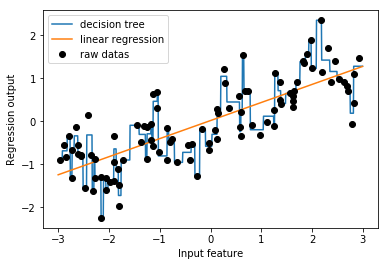

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k',label="raw datas")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

对连续变量离散化，模型会更稳定, 离散化通常采用分箱法;    
**特征分箱**: 将一个连续特征划分为多个离散特征, 用一个箱子代替一个**数据片段**;

In [20]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


np.digitize(X): 返回输入数组中每个值所属bin的索引;

In [21]:
which_bin = np.digitize(X, bins=bins)
%A X[:5]; which_bin[:5]

  X[:5]    which_bin[:5]
---------  -------------
[[-0.75],  [[ 4],       
 [ 2.7 ],   [10],       
 [ 1.39],   [ 8],       
 [ 0.59],   [ 6],       
 [-2.06]]   [ 2]]       


如何将**连续特征进行独热变换**?    
将连续特征变为分类特征: 用**特征数值所在箱子的编号**代替特征数值即可;    
再将分类特征进行独热变换;

In [22]:
from sklearn.preprocessing import OneHotEncoder
# 将独热变换器实例化
encoder = OneHotEncoder(sparse=False)
# X是连续特征, which_bin是其分类特征, 将分类特征进行独热变换
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
%A X_binned.shape # 进行独热变换之后数据的形状

X_binned.shape # 进行独热变换之后数据的形状
------------------------------
(100, 10)                     


在分箱特征上比较线性回归和决策树回归:

Text(0.5,0,'Input feature')

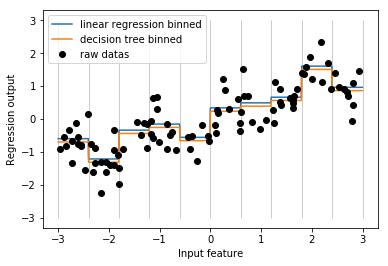

In [23]:
# 将连续特征进行独热变换: (1000,1)->(1000,10)
# line_binned相当于测试集, 训练集X做了独热变换, 测试集也要做独热变换 
line_binned = encoder.transform(np.digitize(line, bins=bins)) 

reg = LinearRegression().fit(X_binned, y)
# 0.1 将重合的两条线错开
plt.plot(line, reg.predict(line_binned)+.1, label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k',label="raw datas")
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

> 线性回归和决策树回归的两条线重合, 说明两种模型做出了相同的预测;    
* 对于每个箱子, 两种模型都预测一个常数值, 因为每个箱子内的特征是不变的;    
* 特征分箱对线性模型引入了非线性, 增强了线性模型对数据的适应能力;    
* 但是降低了决策树模型的能力, 因为决策树模型在无箱的情况下就相当于每个箱子可以预测多个值;

## 交互特征与多项式特征

##### 使分箱后的线性模型添加斜率

将**原始特征作为额外一维特征**放置在分箱数据的最后一列, 可以为分箱数据上的线性模型添加斜率; 

In [24]:
X_combined = np.hstack([X, X_binned])
%A X_combined.shape

X_combined.shape
----------------
(100, 11)       


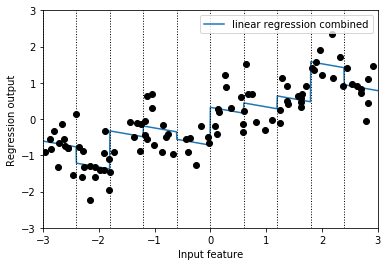

In [25]:
reg = LinearRegression().fit(X_combined, y) # 标签集y不需要变化

# 训练集做什么样的变化, 测试集就要做什么养的变化
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

# 为每个箱子的边界画一条垂直于x轴的虚线
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

添加乘积特征, 可使每个箱子具有不同斜率

In [26]:
X_product = np.hstack([X_binned, X * X_binned])
%A X_product.shape

X_product.shape
---------------
(100, 20)      


> * X * X_binned: X中的每个元素乘以对应的X_binned中一行数据, 每个箱子中的X成分不同, 导致每个箱子的斜率不同;   
* 分箱操作+特征乘积->同时拟合10个线性模型

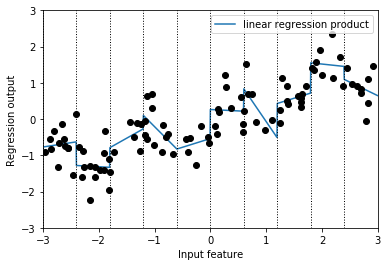

In [27]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

**扩展连续特征**的方法:    
1. 分箱: 扩维成分类特征;
1. 添加原始特征的**多项式特征**: 扩围成连续特征;

##### 原始特征的多项式特征:

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# 特征多项式的最高幂次是10
# include_bias=True -> x0=1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [29]:
%A X.shape; X_poly.shape

X.shape   X_poly.shape
--------  ------------
(100, 1)  (100, 10)   


In [30]:
poly.get_feature_names() # 特征多项式的特征名

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

线性模型 + 多项式特征 -> **多项式回归**:

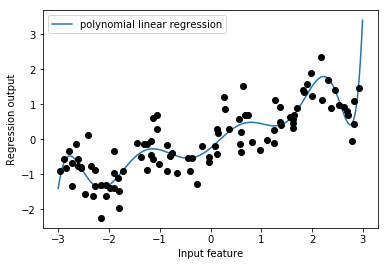

In [31]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

核SVN与多项式回归的模型结果接近, 但是不需要添加新特征:

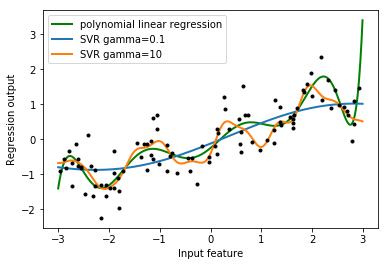

In [32]:
from sklearn.svm import SVR

# 多项式回归
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),'g',\
         label='polynomial linear regression',lw=2)

# 核 SVM
for gamma in [.1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), \
             label='SVR gamma={}'.format(gamma), lw=2)

plt.plot(X[:, 0], y, 'o', c='k', ms=3)
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

**交互特征**(x1*x2)和**多项式特征(x1^2,x2^2)**对波士顿房价数据集的影响:

In [33]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,\
                                                    random_state=0)
# 数据缩放
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
poly = PolynomialFeatures(degree=2, include_bias=True).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
%A X_train.shape; X_train_poly.shape

X_train.shape  X_train_poly.shape
-------------  ------------------
(379, 13)      (379, 105)        


In [35]:
# 查看交叉特征的特征名
p = np.array( poly.get_feature_names())
p=p[:,None]
%A 1 p[14:27]; p[27:39]; p[39:50]; p[99:102] ; p[102:104];p[104:105]
# <p[50:60]; p[60:69]; p[69:77]; p[77:84];p[84:90]; p[90:95]; p[95:99]> 

  p[14:27]     p[27:39]     p[39:50]     p[99:102]     p[102:104]   p[104:105]
------------ ------------ ------------ ------------- ------------- -----------
[['x0^2'],   [['x1^2'],   [['x2^2'],   [['x10^2'],   [['x11^2'],   [['x12^2']]
 ['x0 x1'],   ['x1 x2'],   ['x2 x3'],   ['x10 x11'],  ['x11 x12']]            
 ['x0 x2'],   ['x1 x3'],   ['x2 x4'],   ['x10 x12']]                          
 ['x0 x3'],   ['x1 x4'],   ['x2 x5'],                                         
 ['x0 x4'],   ['x1 x5'],   ['x2 x6'],                                         
 ['x0 x5'],   ['x1 x6'],   ['x2 x7'],                                         
 ['x0 x6'],   ['x1 x7'],   ['x2 x8'],                                         
 ['x0 x7'],   ['x1 x8'],   ['x2 x9'],                                         
 ['x0 x8'],   ['x1 x9'],   ['x2 x10'],                                        
 ['x0 x9'],   ['x1 x10'],  ['x2 x11'],                                        
 ['x0 x10'],  ['x1 x11'],  ['x2 x12']]              

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


## 单变量非线性变换

添加特征的平方项和立方项可以改进线性模型, 添加**特征的log项**和sin项当然也有可能改进线性模型的性能;    
因为log和exp函数可以**协调数据(在每个特征方向的数据)的相对比例**, 使其分布跟接近于钟形曲线的形状(高斯分布);    
**单变量非线性变换**: 将某个特征进行log(exp,sin,cos)变换;

In [38]:
# 创建计数数据集
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson( 10 * np.exp(X_org) )
y = np.dot( X_org,w )

In [39]:
i = 6
%A 2 X_org[:i]; X[:i]; w[:,None]; y[:i,None]

       X_org[:i]             X[:i]       w[:,None]  y[:i,None]
-----------------------  --------------  ---------  ----------
[[ 1.76,  0.4 ,  0.98],  [[56, 18, 27],  [[ 1.59],  [[2.93],  
 [ 2.24,  1.87, -0.98],   [81, 57,  3],   [ 0.57],   [4.74],  
 [ 0.95, -0.15, -0.1 ],   [25,  9, 11],   [-0.11]]   [1.44],  
 [ 0.41,  0.14,  1.45],   [20, 13, 30],              [0.57],  
 [ 0.76,  0.12,  0.44],   [27, 13, 13],              [1.23],  
 [ 0.33,  1.49, -0.21]]   [18, 46,  7]]              [1.4 ]]  


v[:i]  counts[:i]  v[j-i:j]  counts[j-i:j]
-----  ----------  --------  -------------
[[0],  [[28],      [[108],   [[1],        
 [1],   [38],       [109],    [1],        
 [2],   [68],       [112],    [1],        
 [3],   [48],       [120],    [1],        
 [4],   [61],       [125],    [1],        
 [5]]   [59]]       [140]]    [1]]        


Text(0,0.5,'counts')

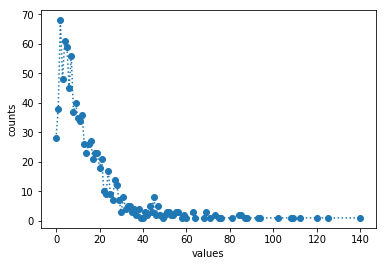

In [40]:
# 第一个特征可取哪些值, 将值排序并作为列向量输出 
v_ = np.sort(np.array(list(set(X[:,0]))))
v = v_[:,None]
j = len(v)
# 计算每个值出现的次数
counts_ = np.bincount(X[:,0])
counts = counts_[v_][:,None]

# 前5对值和后5对值
%A v[:i];counts[:i];v[j-i:j]; counts[j-i:j]
# 可视化 
plt.plot(v,counts,'o:')
plt.xlabel("values")
plt.ylabel("counts")

Text(0.5,0,'Value')

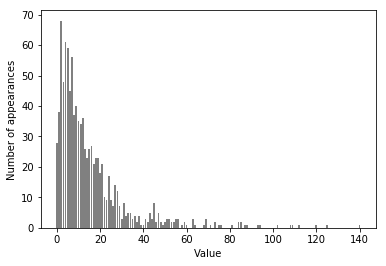

In [41]:
# 使用柱状图可视化
bins = np.bincount( X[:, 0] )
plt.bar( range(len(bins)), bins, color='grey' )
plt.ylabel("Number of appearances")
plt.xlabel("Value")

> 该特征取值的的特点:    
有许多较小的值, 和一些非常大的值, 不服从高斯分布, 线性模型对这种特点的特征受限;

In [42]:
# 原始数据应用岭回归@
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


将原始数据做对数变换，数据分布的不对称性变小，如果数据中有0，使用log(X+1)

Text(0.5,0,'Value')

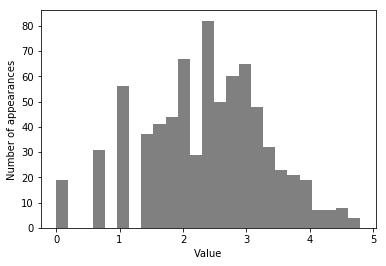

In [43]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [44]:
# 原始数据对数变换后应用岭回归
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


> 寻找数据集变换和可选模型的最佳组合是一们艺术:
* 对数据集做分箱, 多项式, 交叉多项式变换, 可以使线性模型的发挥更强大的功能;    

* 通常请状况下, 基于树的模型能够自己发现重要的交互项, 不需要显式的变换数据;

## 自动化特征选择

**自动化特征选择**: 识别没有信息量的特征并删除它们;    

**特征个数影响模型的复杂度**:
* 创建新特征的方法: 独热变换, 分箱, 多项式都会增大数据的维度, 虽然怎加了模型的适应能力, 但是可能会使模型变得过于复杂, 造成过拟合;    
* 特征个数少, 模型过于简单 , 特征个数非常多, 模型过于复杂, 因此特征的最佳个数也是一个值得考虑的问题;     

如何判断每个特征的作用有多大？
* 单变量统计
* 基于模型的选择
* 迭代选择    
* 这些选择方法都是监督方法, 需要目标值来拟合数据;    


### 单变量统计

**单变量统计**:    
* 单独查看每个特征和目标值之间的关系是否存在**统计显著性**;      
* 单变量测试的计算速度很快, 不需要构建模型;
* 单变量统计与模型要解决的问题(回归问题还是分类问题)无关;     

识别没有信息量的特征并删除:

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile 
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
# 获得确定性的随机数
rng = np.random.RandomState(42)
# 为原始特征添加50个噪声特征
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

# 应用特征选择估计器
X_train, X_test, y_train, y_test = train_test_split( X_w_noise, cancer.target,\
                                                random_state=0, test_size=.5)
select = SelectPercentile( percentile=50 )
select.fit( X_train,y_train) # 特征选选择需要目标向量做参数
X_train_selected = select.transform( X_train ) # transform变换将将冗余的特征剔除

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


> **特征选择估计器**:
* SelectPercentile: 选择固定百分比的特征;
* SelectKBest: 选择固定数量的K个特征;    

> 特征选择估计器的参数:    
* f_classif(default): 为分类问题选择特征; 
* f_regression: 为回归问题选择特征;

select.get_support()方法: 用于查看特征选择估计器选择了哪些特征;

In [46]:
mask = select.get_support()
mask[:i]

array([ True,  True,  True,  True,  True,  True])

> select.get_support()返回一个遮罩数组, 与每个特征的索引对应, 告诉其是否选中; 

([], <a list of 0 Text yticklabel objects>)

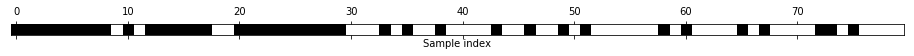

In [47]:
# 将遮罩数组可视化, 黑色代表选中的特征
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

> 大多数所选中的特征都是原始特征, 并且大多数噪声特征都被删除;    

In [48]:
mask.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False,  True, False,  True,
        False, False,  True, False, False, False, False,  True, False,
        False,  True, False, False,  True, False,  True, False, False,
        False, False, False, False,  True, False,  True, False, False,
        False, False,  True, False,  True, False, False, False, False,
         True,  True, False,  True, False, False, False, False]])

In [49]:
from sklearn.linear_model import LogisticRegression

# 将测试集做相同的变换,剔除冗余特征
X_test_selected = select.transform(X_test)

lr1 = LogisticRegression().fit(X_train, y_train)
lr2 = LogisticRegression().fit(X_train_selected, y_train)

print("Score with all features: {:.3f}".format(
                                        lr1.score(X_test, y_test)))
print("Score with only selected features: {:.3f}".format(
                                        lr2.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


> 剔除噪声虽然丢失了某些原始信息, 但是可以提高模型的性能:

### 基于模型的特征选择

**基于模型的特征选择**:    
* 首先使用一个可以给出**特征重要性度量**的**辅助模型**进行特征选择, 然后再将数据传递给**实际模型**进行数据处理;    
* 显然, 辅助模型和实际模型可以相同也可以不同;     

**可做辅助模型的模型**有哪些:    
* 基于树的所有模型: 使用feature_importances_属性给出特征重要性度量
* 线性模型: 系数的绝对值可以表示特征重要性;
* 通过L1惩罚的线性模型: 通过将系数设置为0, 从而剔除某些特征;
 
**基于模型的特征选择**与**单变量特征选择**的不同:     
* 单变量特征的选择只考虑单个特征和目标值之间的联系;
* 基于模型的特征选择还考虑了特征之间的交互性质;

In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel( RandomForestClassifier(n_estimators=100, random_state=42),
                        threshold="median" )

> * SelectPercentile: 单变选择变换器;
* SelectFromModel: 基模选择变换器; 基模选择变换器需要模型作为参数; 
    * threshold="median": 选择一半特征;

In [51]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

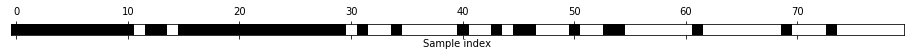

In [52]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

> * 除了两个原始特征, 其他原始特征全部选中;   
* 基于模型的特征选择比单变量特征选择更强大;

In [53]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


### 迭代特征选择

**迭代特征选择RFE**: 将基于模型的特征选择不断迭代下去, 每迭代一次删除一个特征;   

([], <a list of 0 Text yticklabel objects>)

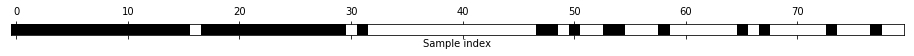

In [54]:
from sklearn.feature_selection import RFE
select = RFE( RandomForestClassifier(n_estimators=100,random_state=42),
              n_features_to_select=40)
select.fit( X_train,y_train )
# 将选择的特征可视化
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

> 迭代特征的选择性更好, 单任然丢掉了一个原始特征;    

In [55]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


select有score()方法, 说明辅助模型亦可作实际模型

In [56]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


> 如果选择了正确的特征, 线性模型的精度可以与树模型的精度媲美;

## 利用专家知识

**利用专家知识**: 将关于任务属性的先验知识(常识)编码到特征中, 以辅助机器学习算法; 

    例如, 机票价格可能与节假日相关, 如果数据集只有日期这一个特征, 那么模型不一定能发现价格与节假日的关系, 因为有些节假日并不是在固定的日期出现(圣诞节日期固定但是中秋节的日期却不固定), 或者学校假期, 因此添加额外的一组或几组类似于日期的特征便很重要;    

##### 根据日期和时间预测家门口自行车的借用量

In [57]:
# citibike是一个数据框对象
citibike = mglearn.datasets.load_citibike()
%A 5 citibike.head(i); citibike.tail(i) 

         citibike.head(i)                      citibike.tail(i)        
---------------------------------     ---------------------------------
starttime                             starttime                        
2015-08-01 00:00:00     3             2015-08-31 06:00:00    36        
2015-08-01 03:00:00     0             2015-08-31 09:00:00    16        
2015-08-01 06:00:00     9             2015-08-31 12:00:00     8        
2015-08-01 09:00:00    41             2015-08-31 15:00:00    17        
2015-08-01 12:00:00    39             2015-08-31 18:00:00    22        
2015-08-01 15:00:00    27             2015-08-31 21:00:00     7        
Freq: 3H, Name: one, dtype: int64     Freq: 3H, Name: one, dtype: int64


In [58]:
xticks = pd.date_range(start=citibike.index.min(), 
                       end=citibike.index.max(),
                       freq='D')
%A xticks[:2];;xticks.astype("int")[:2];; xticks.strftime("%a %m-%d")[:2]

                                  xticks[:2]                                 
-----------------------------------------------------------------------------
DatetimeIndex(['2015-08-01', '2015-08-02'], dtype='datetime64[ns]', freq='D')

                       xticks.astype("int")[:2]                      
---------------------------------------------------------------------
Int64Index([1438387200000000000, 1438473600000000000], dtype='int64')

         xticks.strftime("%a %m-%d")[:2]         
-------------------------------------------------
Index(['Sat 08-01', 'Sun 08-02'], dtype='object')


(735811.00, 735841.88)

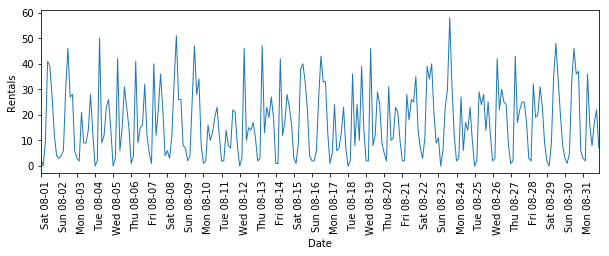

In [59]:
plt.figure( figsize=(10,3) )
plt.xticks(xticks, xticks.strftime("%a %m-%d"),rotation=90, ha="left")
plt.plot( citibike, linewidth=1 )
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.xlim( citibike.index.min(),citibike.index.max() )

In [60]:
% A citibike.index.min();; citibike.index.max()

            citibike.index.min()           
-------------------------------------------
Timestamp('2015-08-01 00:00:00', freq='3H')

            citibike.index.max()           
-------------------------------------------
Timestamp('2015-08-31 21:00:00', freq='3H')


> 时间点对象可以做x轴;

In [61]:
# 提取目标值, 租车数量
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [62]:
# 以日期为界限划分训练集和测试集
n_train = 184  # 训练集中数据点的个数

#  对给定特征集上的回归模型进行评估并且可视化
def eval_on_features(features, target, regressor):
    # 将数据划分为训练集和测试集
    X_train, X_test = features[:n_train], features[n_train:]
    # 分割目标集
    y_train, y_test = target[:n_train], target[n_train:]
    # 构建回归模型
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10, 3))
    # 一天有8个数据点, 每个数据点的 x 间隔都是1;
    plt.xticks(range(0, len(X), 8), 
               xticks.strftime("%a %m-%d"), 
               rotation=90,ha="left") # 0,8,16...,232,240; 总31个刻度; 

    plt.plot(range(n_train), 
                            y_train, ':k', label="train")    # 训练集的x轴范围
    plt.plot(range(n_train,len(y_test) + n_train), 
                            y_test, ':b', label="test") # 测试集的x轴范围
    plt.plot(range(n_train),
                            y_pred_train, 'g-', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train),
                            y_pred, 'r',label="prediction test")
   
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

用随机森林回归拟合原始数据: 

Test-set R^2: -0.04


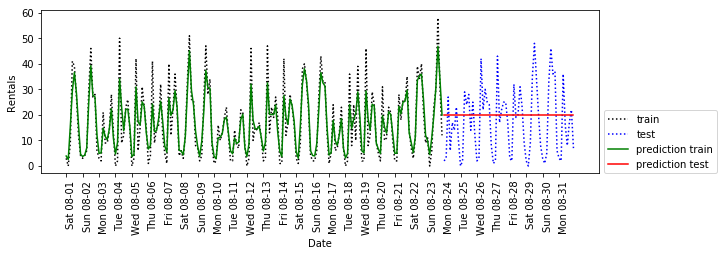

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

> 随机森林需要很少数据预处理, 似乎很适合处理这个问题;    
然而R^2几乎为0, 该模型什么也没学到?
* 树模型不可以外推;
* 观察原始数据的图像, 可以发现两个因素似乎很重要, 一天内的时间, 当天属于周几;    


从POSIX时间中学不任何内容(相对于测试集的预测而言), 删除这个特征, 改为仅使用每天的时刻;    

Test-set R^2: 0.60

             X_hour[:9].T             
--------------------------------------
[[ 0,  3,  6,  9, 12, 15, 18, 21,  0]]


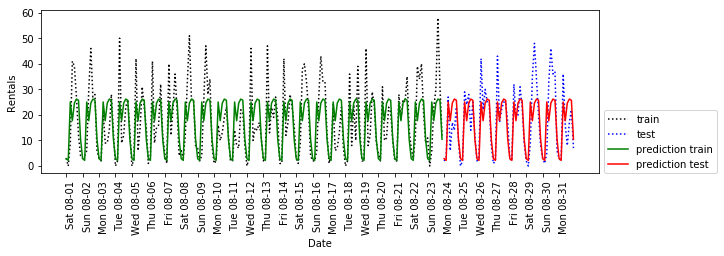

In [64]:
# 仅使用每天的时刻
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor) #对给定特征集上的回归模型进行评估并且可视化
print()
%A X_hour[:9].T

> 随机森林模型可以用于外推了?

添加周特征: 

Test-set R^2: 0.84


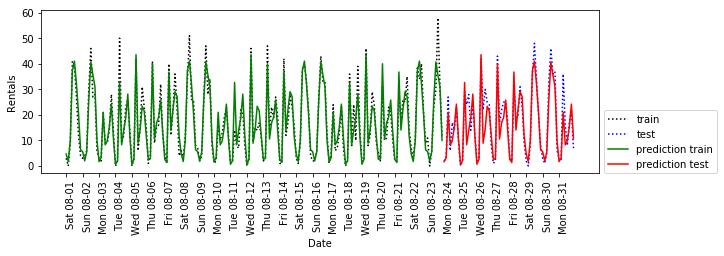

In [65]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

> * DF对象具有**根据日期自动计算周期**(星期几)的功能;    
* 添加时间特征和周特征之后, 随机森林模型捕捉到了周期性的行为; 因此可以外推了;    

用线性模型代替随机森林模型:

Test-set R^2: 0.13


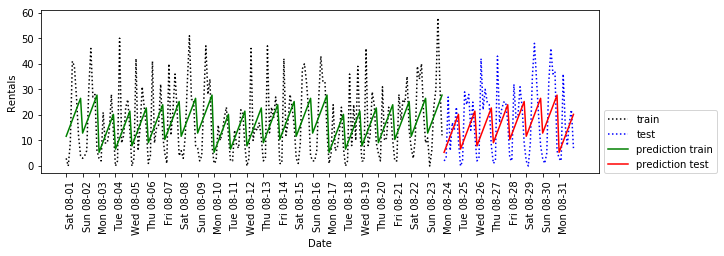

In [66]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

> 用线性模型代替随机森林模型并没有给出类似的结果?    
* 线性模型只能捕捉时间段特征而不能捕捉到周特征, 因此要将周特征的分类性解决成连续性;

将周特征解释为分类变量:

In [67]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


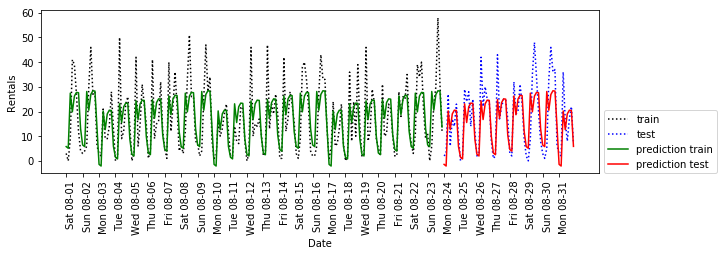

In [68]:
eval_on_features(X_hour_week_onehot, y, Ridge())

添加时刻特征和周特征的交互项: 

Test-set R^2: 0.85


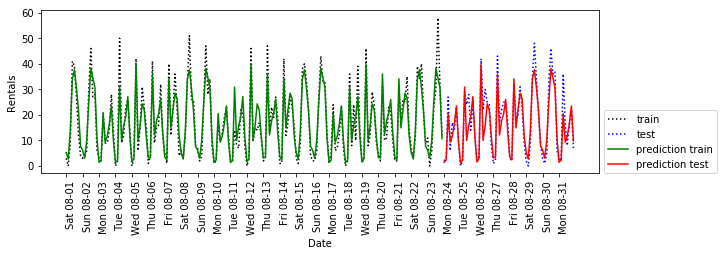

In [69]:
poly_transformer = PolynomialFeatures( degree=2, interaction_only=True,
                                      include_bias=False )
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

将线性模型学到的系数作图, 包括交互项的系数, 但是树模型却给不出交互项的特征重要性; 

Text(0,0.5,'Feature magnitude')

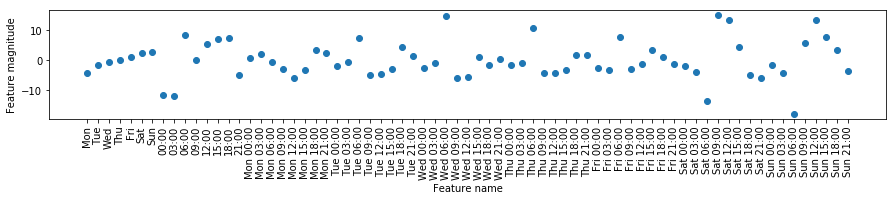

In [70]:
# 为时刻特征和周特征创建名称
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

# 对交互特征命名
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

## 小结与展望

基本问题和概念:    
* 分类特征变为连续特征的方法: OneHot编码;
* 连续特征变为分类特征的方法: 特征分箱;
* 从原始特征扩展特征的方法: 多项式变换, 交叉项变换;
* 将单列特征的分布接近于高斯分布: 单变量非线性变换(log变换); 
* 自动化特征选择的方法: 单变量特征选择, 基于模型的特征选择, 迭代特征选择;
* 基于先验知识的添加额外特征: 添加时间特征或者周特征;